In [1]:
!pip install numpy pandas matplotlib seaborn -q

In [2]:
!pip install jovian opendatasets xgboost graphviz lightgbm scikit-learn -q --upgrade

     |████████████████████████████████| 68 kB 3.1 MB/s 
     |████████████████████████████████| 173.6 MB 8.0 kB/s 
     |████████████████████████████████| 46 kB 1.6 MB/s 
     |████████████████████████████████| 2.0 MB 32.8 MB/s 


In [3]:
import numpy as np
import pandas as pd


In [4]:
import os
import opendatasets as od
pd.set_option('display.max_columns',120)
pd.set_option('display.max_rows', 120)

In [5]:
od.download('https://www.kaggle.com/c/rossmann-store-sales')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rajatsoni1991
Your Kaggle Key: ··········


100%|██████████| 6.99M/6.99M [00:00<00:00, 97.6MB/s]


Extracting archive ./rossmann-store-sales/rossmann-store-sales.zip to ./rossmann-store-sales


In [6]:
os.listdir('rossmann-store-sales')

['test.csv', 'sample_submission.csv', 'store.csv', 'train.csv']

In [7]:
ross_df = pd.read_csv('rossmann-store-sales/train.csv')
store_df = pd.read_csv('rossmann-store-sales/store.csv')
test_df = pd.read_csv('rossmann-store-sales/test.csv')
submission_df = pd.read_csv('rossmann-store-sales/sample_submission.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
test_df


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [9]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [10]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [11]:
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [12]:
merged_df = ross_df.merge(store_df, how= 'left', on= 'Store')

In [13]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left: 'DataFrame | Series', right: 'DataFrame | Series', how: 'str' = 'inner', on: 'IndexLabel | None' = None, left_on: 'IndexLabel | None' = None, right_on: 'IndexLabel | None' = None, left_index: 'bool' = False, right_index: 'bool' = False, sort: 'bool' = False, suffixes: 'Suffixes' = ('_x', '_y'), copy: 'bool' = True, indicator: 'bool' = False, validate: 'str | None' = None) -> 'DataFrame'
    Merge DataFrame or named Series objects with a database-style join.
    
    A named Series object is treated as a DataFrame with a single named column.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    When performing a cross merge, no column specifications to merge on are
    allowed.
    
    Parameters
    ----------
    left : DataFrame
  

In [14]:
merged_df


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [15]:
merged_test_df = test_df.merge(store_df, on= 'Store', how= 'left')

In [16]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [18]:
merged_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [19]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

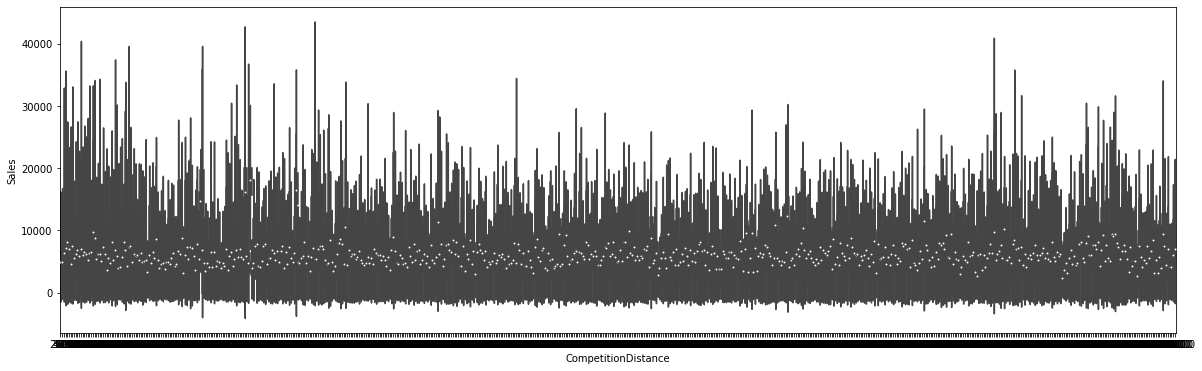

In [20]:
plt.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(20,6))
sns.violinplot(data= merged_df,
                x= 'CompetitionDistance',
                y= 'Sales');


In [21]:
merged_df.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

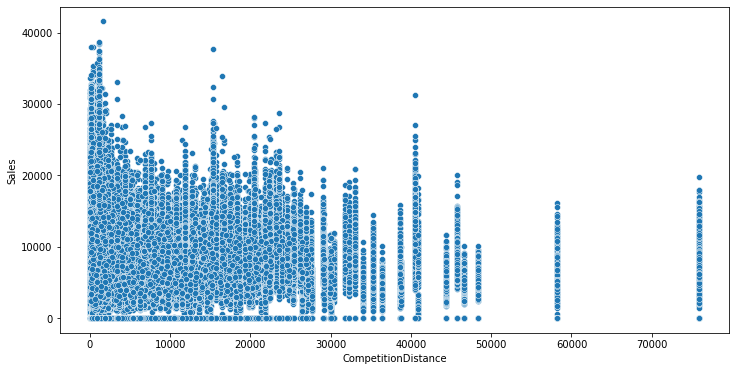

In [22]:

plt.rcParams['figure.figsize']= (12,6)
sns.scatterplot(x= merged_df.CompetitionDistance,y= merged_df.Sales)

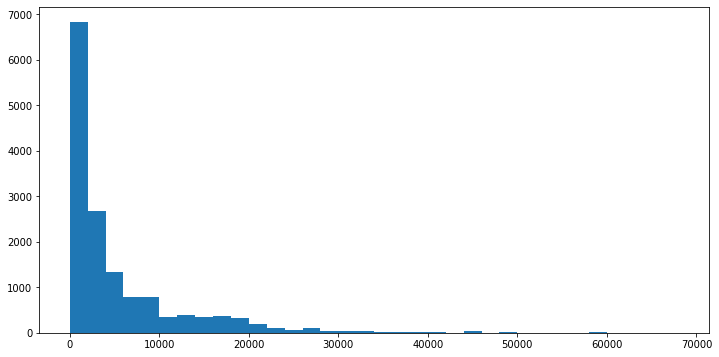

In [23]:
plt.hist(merged_df.CompetitionDistance.sample(15000), bins =np.arange(0,70000, 2000));


In [24]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [25]:
merged_df.StoreType.describe()

count     1017209
unique          4
top             a
freq       551627
Name: StoreType, dtype: object

In [26]:
merged_df.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [27]:
merged_df.shape

(1017209, 18)

In [28]:
merged_df.SchoolHoliday.value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

In [29]:
def split_date(df):
  df['Date'] = pd.to_datetime(df['Date'])
  df['Year'] = df.Date.dt.year
  df['Month'] = df.Date.dt.month
  df['Day'] = df.Date.dt.day
  df['WeekOfYear'] = df.Date.dt.isocalendar().week
                              


In [30]:
split_date(merged_df)
split_date(merged_test_df)

In [31]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


In [32]:
merged_df[merged_df.Open==0] .Sales.value_counts()

0    172817
Name: Sales, dtype: int64

In [33]:
merged_df = merged_df[merged_df.Open==1].copy()

In [34]:
merged_df.CompetitionOpenSinceYear 

0          2008.0
1          2007.0
2          2006.0
3          2009.0
4          2015.0
            ...  
1016776    2006.0
1016827    1999.0
1016863       NaN
1017042       NaN
1017190    2002.0
Name: CompetitionOpenSinceYear, Length: 844392, dtype: float64

In [35]:
def comp_months(df):
  df['CompetitionOpen'] = 12 * (df.Year- df.CompetitionOpenSinceYear)+ (df.Month- df.CompetitionOpenSinceMonth)
  df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x<0 else x ).fillna(0)

In [36]:
comp_months(merged_df)
comp_months(merged_test_df)

In [37]:
merged_df[['Date', 'CompetitionDistance', 'CompetitionOpenSinceYear','CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(20)

,Date,CompetitionDistance,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionOpen
33240,2015-07-02,90.0,2010.0,7.0,60.0
405222,2014-07-04,20390.0,NaN,NaN,0.0
625868,2013-12-17,4590.0,2000.0,3.0,165.0
1011688,2013-01-05,7170.0,2014.0,8.0,0.0
277061,2014-11-18,4270.0,NaN,NaN,0.0
122123,2015-04-13,360.0,NaN,NaN,0.0
173576,2015-02-26,970.0,2013.0,3.0,23.0
871829,2013-05-11,650.0,2013.0,11.0,0.0
395352,2014-07-14,2300.0,NaN,NaN,0.0
167711,2015-03-03,44320.0,2008.0,8.0,79.0


In [38]:
def check_promo_month(row):
  month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
  
  try:
    months = (row['PromoInterval'] or '').split(',')
    if row['Promo2Open'] and month2str[row['Months']] in months:
      return 1
    else:
      return 0
  except Exception:
    return 0

def Promo_cols(df):
  df['Promo2Open'] = 12*(df.Year- df.Promo2SinceYear)+ (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
  df['Promo2Open']= df['Promo2Open'].map(lambda x: 0 if x<0 else x).fillna(0)*df['Promo2']
  df['IsPromoMonth'] = df.apply(check_promo_month, axis = 1)* df['Promo2']

In [39]:
Promo_cols(merged_df)
Promo_cols(merged_test_df)

In [40]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromoMonth'],
      dtype='object')

In [41]:
merged_df.StateHoliday.nunique()

5

In [42]:
merged_df.StateHoliday.replace('0','d', inplace=True)
merged_df.StateHoliday.replace(0,'d', inplace=True)

In [43]:
merged_df.StateHoliday.value_counts()

d    843482
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

In [44]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 'Day', 'Month', 'Year', 'WeekOfYear', 'Promo2','Promo2Open', 'IsPromoMonth']
target_cols = 'Sales'

In [45]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_cols].copy()

In [46]:
test_inputs = merged_test_df[input_cols].copy()

In [47]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpen','Promo2', 'Promo2Open', 'IsPromoMonth', 'Day', 'Month','Year', 'WeekOfYear' ]
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

In [48]:
inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Promo2                    0
Promo2Open                0
IsPromoMonth              0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
dtype: int64

In [49]:
test_inputs[numeric_cols].isna().sum()

Store                   0
Promo                   0
SchoolHoliday           0
CompetitionDistance    96
CompetitionOpen         0
Promo2                  0
Promo2Open              0
IsPromoMonth            0
Day                     0
Month                   0
Year                    0
WeekOfYear              0
dtype: int64

In [50]:
max_distance = merged_df.CompetitionDistance.max()

In [51]:
inputs['CompetitionDistance'].fillna(max_distance, inplace=True)
test_inputs['CompetitionDistance'].fillna(max_distance, inplace=True)

In [52]:
inputs[numeric_cols].isna().sum()

Store                  0
Promo                  0
SchoolHoliday          0
CompetitionDistance    0
CompetitionOpen        0
Promo2                 0
Promo2Open             0
IsPromoMonth           0
Day                    0
Month                  0
Year                   0
WeekOfYear             0
dtype: int64

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [55]:
inputs[numeric_cols]= scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [56]:
from sklearn.preprocessing import OneHotEncoder

In [57]:
encoder = OneHotEncoder(sparse=False, handle_unknown ='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [58]:
encoded_cols

['DayOfWeek_1',
 'DayOfWeek_2',
 'DayOfWeek_3',
 'DayOfWeek_4',
 'DayOfWeek_5',
 'DayOfWeek_6',
 'DayOfWeek_7',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c',
 'StateHoliday_d',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

In [59]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols]= encoder.transform(test_inputs[categorical_cols])

In [60]:
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [61]:
from xgboost import XGBRegressor

In [62]:
?XGBRegressor

In [63]:
model = XGBRegressor(randome_state =42, n_jobs = -1, n_estimators = 20, max_depth = 4)

In [64]:
%%time
model.fit(X,targets)

[09:51:24] WARNING: ../src/learner.cc:576: 
Parameters: { "randome_state" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


CPU times: user 38.5 s, sys: 318 ms, total: 38.8 s
Wall time: 20.1 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0,
             randome_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [65]:
preds = model.predict(X)

In [66]:
preds

array([ 8323.803 ,  7716.3823,  8634.8955, ...,  6486.2915,  9425.37  ,
       10267.446 ], dtype=float32)

In [67]:
from sklearn.metrics import mean_squared_error

def rmse(a,b):
  return mean_squared_error(a,b,squared= False)

In [68]:
rmse(preds, targets)

2379.4740891775054

In [69]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pyplot import rcParams
%matplotlib inline

rcParams['figure.figsize']= 30,30

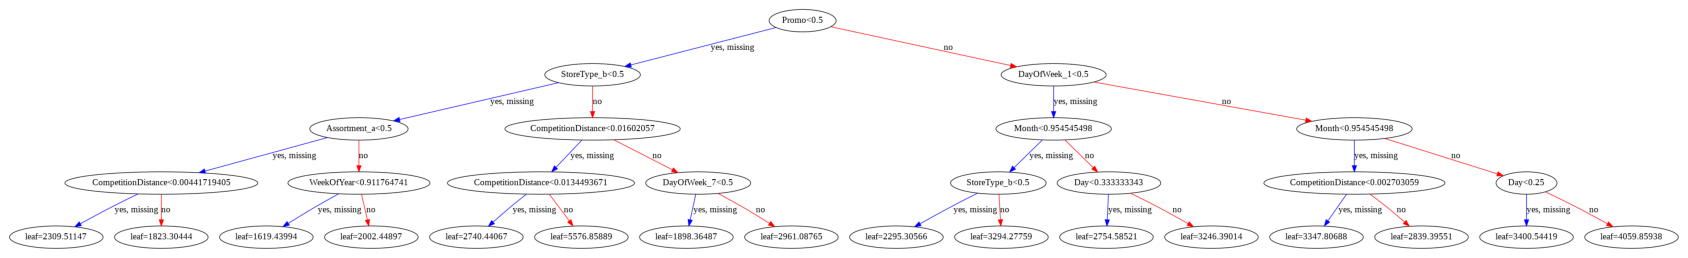

In [70]:
plot_tree(model);

In [71]:
?plot_tree

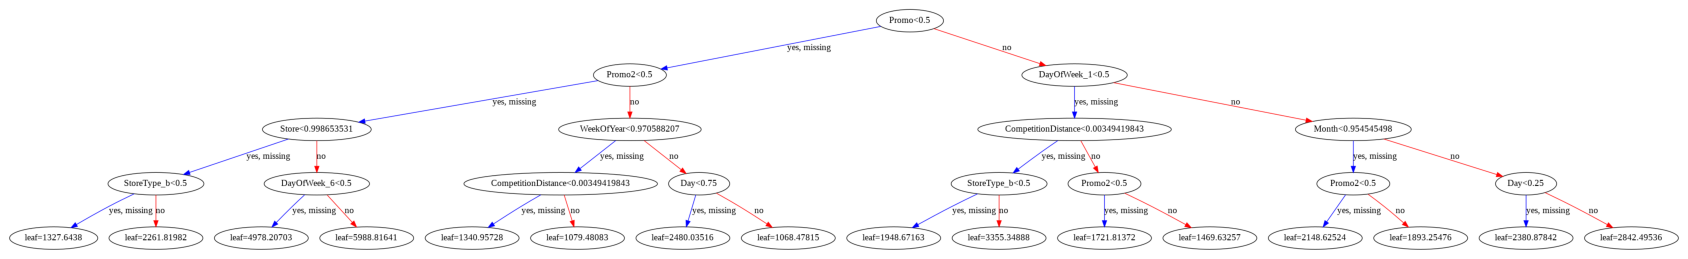

In [72]:
plot_tree(model , randir= 'LR', num_trees= 1);

In [73]:
trees = model.get_booster().get_dump()

In [74]:
len(trees)

20

In [75]:
print(trees[0])

0:[Promo<0.5] yes=1,no=2,missing=1
	1:[StoreType_b<0.5] yes=3,no=4,missing=3
		3:[Assortment_a<0.5] yes=7,no=8,missing=7
			7:[CompetitionDistance<0.00441719405] yes=15,no=16,missing=15
				15:leaf=2309.51147
				16:leaf=1823.30444
			8:[WeekOfYear<0.911764741] yes=17,no=18,missing=17
				17:leaf=1619.43994
				18:leaf=2002.44897
		4:[CompetitionDistance<0.01602057] yes=9,no=10,missing=9
			9:[CompetitionDistance<0.0134493671] yes=19,no=20,missing=19
				19:leaf=2740.44067
				20:leaf=5576.85889
			10:[DayOfWeek_7<0.5] yes=21,no=22,missing=21
				21:leaf=1898.36487
				22:leaf=2961.08765
	2:[DayOfWeek_1<0.5] yes=5,no=6,missing=5
		5:[Month<0.954545498] yes=11,no=12,missing=11
			11:[StoreType_b<0.5] yes=23,no=24,missing=23
				23:leaf=2295.30566
				24:leaf=3294.27759
			12:[Day<0.333333343] yes=25,no=26,missing=25
				25:leaf=2754.58521
				26:leaf=3246.39014
		6:[Month<0.954545498] yes=13,no=14,missing=13
			13:[CompetitionDistance<0.002703059] yes=27,no=28,missing=27
				27:leaf=334

In [76]:
importance_df = pd.DataFrame({
    'feature' : X.columns,
    'Importance' : model.feature_importances_
}).sort_values('Importance', ascending= False)

In [77]:
importance_df

,feature,Importance
1,Promo,0.334828
24,StoreType_b,0.085938
12,DayOfWeek_1,0.081594
5,Promo2,0.063616
3,CompetitionDistance,0.044753
29,Assortment_c,0.039999
0,Store,0.038869
27,Assortment_a,0.038607
9,Month,0.036874
2,SchoolHoliday,0.035441


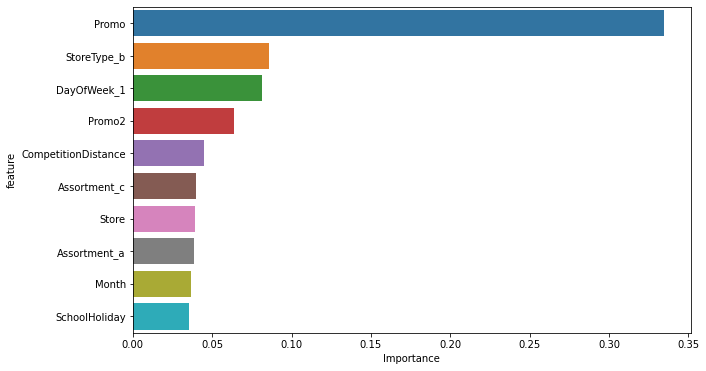

In [78]:
import seaborn as sns
plt.figure(figsize= (10,6))
sns.barplot(data=importance_df.head(10), x='Importance', y='feature')

In [79]:
from sklearn.model_selection import KFold

In [80]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
  model = XGBRegressor(random_state = 42, n_jobs = -1, **params)
  model.fit(X_train, train_targets)
  train_rmse = rmse(model.predict(X_train), train_targets)
  val_rmse = rmse(model.predict(X_val), val_targets)
  return model, train_rmse, val_rmse

In [81]:
Kfold = KFold(n_splits = 5)

In [82]:
models = []

for train_idxs, val_idxs in Kfold.split(X):
  X_train, train_targets = X.iloc[train_idxs],targets.iloc[train_idxs]
  X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
  model, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                   train_targets, 
                                                   X_val, 
                                                   val_targets,
                                                   max_depth= 4,
                                                   n_estimators= 20)
  models.append(model)
  print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 2352.25307174321, Validation RMSE: 2425.4855474004116
Train RMSE: 2397.5789200653003, Validation RMSE: 2437.723084188364
Train RMSE: 2365.7321851723577, Validation RMSE: 2337.3675610940063
Train RMSE: 2366.5475914166336, Validation RMSE: 2461.3683190105603
Train RMSE: 2373.089763100142, Validation RMSE: 2430.3202032856343


In [83]:
import numpy as np
def predict_avg(model, inputs):
  return np.mean([model.predict(inputs) for model in models], axis=0)

In [84]:
preds = predict_avg(models, X)

In [85]:
preds

array([8050.0166, 7608.3643, 8749.434 , ..., 7297.542 , 7764.585 ,
       9332.377 ], dtype=float32)

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
def test_params_kfold(n_splits, **params):
  train_rmse, val_rmse, model = [],[],[]
  kfold = KFold(n_splits)
  for train_idxs, val_idxs in kfold.split(X):
    X_train,train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train, train_targets, X_val, val_targets, **params)
    models.append(model)
    train_rmse.append(train_rmse)
    val_rmse.append(val_rmse)
  print('Train RMSE: {}, Validation RMSE: {}'.format(np.mean(train_rmse), np.mean(val_rmse)))
  return models

In [88]:
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size= 0.1)

In [89]:
def test_params(**params):
  model = XGBRegressor(n_jobs = -1, random_state = 42, **params)
  model.fit(X_train, train_targets)
  train_rmse = rmse(model.predict(X_train), train_targets)
  val_rmse = rmse(model.predict(X_val), val_targets)
  print('Train RMSE: {}, Validation RMSE: {}'. format(train_rmse, val_rmse))

In [90]:
test_params(n_estimators = 100)

Train RMSE: 1201.908877400981, Validation RMSE: 1213.8997709802286


In [91]:
test_params(max_depth = 10)

Train RMSE: 706.3247634624909, Validation RMSE: 795.0252072887047


In [92]:
test_params(n_estimators = 50, learning_rate = 0.1)

Train RMSE: 2177.673059530902, Validation RMSE: 2197.524412833049


In [93]:
test_params(booster= 'gblinear')

Train RMSE: 2725.782764643317, Validation RMSE: 2736.9286030506487


In [94]:
model = XGBRegressor(n_jobs = -1, random_state = 42, n_estimators = 1000,
                     learning_rate = 0.2, max_depth = 10,
                     subsample=0.9, colsample_bytree= 0.7)

In [ ]:
%%time
model.fit(X, targets)